In [505]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import random
import numpy as np

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benjamingantenbein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [506]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

def plot_distribution(file, positive):
    label = 0
    text = 'negative'
    if positive:
        label = 1
        color = '#ff8080'
        text = 'positive'
    else:
        color = '#80bfff'
    df = pd.read_csv(file, sep='\t', header=None)
    df.columns = ["sent", "label"] 
    df['label'].astype(int)
    df['sentence_lengths'] = df['sent'].apply(lambda x: len(nltk.word_tokenize(x)))
    df2 = df[df['label'] == label]

    # create plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df2, x='sentence_lengths', kde=True, color=color)

    # add text box with mean, median, min, and max sentence lengths
    mean = df2['sentence_lengths'].mean()
    median = df2['sentence_lengths'].median()
    min_length = df2['sentence_lengths'].min()
    max_length = df2['sentence_lengths'].max()

    textstr = '\n'.join((
        r'$\mathrm{Mean}=%.2f$' % (mean, ),
        r'$\mathrm{Median}=%.2f$' % (median, ),
        r'$\mathrm{Min}=%d$' % (min_length, ),
        r'$\mathrm{Max}=%d$' % (max_length, )))

    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='left', bbox=props)
    title =  'Distribution of ' + text+  ' Sentence Lengths'
    plt.title(title)
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()




In [507]:
def drop_word_length(df, drop_pct, length):
    # Get the indices of rows with word length 2 and label 0
    indices_with_word_length_2 = df.index[(df['sentence_lengths'] == length) & (df['label'] == 0)].tolist()
    
    # Calculate the number of rows to drop based on the drop percentage
    drop_count = int(len(indices_with_word_length_2) * drop_pct)
    
    # Randomly select rows to drop
    indices_to_drop = np.random.choice(indices_with_word_length_2, drop_count, replace=False).tolist()
    
    # Filter the DataFrame to only keep the rows that were not dropped
    df_filtered = df.loc[~df.index.isin(indices_to_drop)].reset_index(drop=True)
    
    return df_filtered

In [508]:
random_seed =42

def equalize_category_counts(df, col_name):
    # Count the number of occurrences of each category
    category_counts = df[col_name].value_counts()

    # Find the minimum count across all categories
    min_count = category_counts.min()

    if random_seed is not None:
        random.seed(random_seed)

    #ACHTUNG ACHTUNG ACHtuNG
    ##min_count =200


    # Randomly drop rows from each category until the minimum count is reached
    indices_to_keep = []
    for category, count in category_counts.iteritems():
        indices = df.index[df[col_name] == category].tolist()
        if count > min_count:
            indices_to_keep.extend(np.random.choice(indices, min_count, replace=False).tolist())
        else:
            indices_to_keep.extend(indices)

    # Filter the DataFrame to only keep the selected rows
    df_filtered = df.loc[indices_to_keep].reset_index(drop=True)

    return df_filtered


In [509]:
def plot_categorical_distribution(file, category):
    if category == 0:
        label = 0
        text = 'other'
        color = '#808080'
    elif category == 1:
        label = 1
        text = 'question'
        color = '#ff8080'
    elif category == 2:
        label = 2
        text = 'reflection'
        color = '#80bfff'
    elif category == 3:
        label = 3
        text = 'input'
        color = '#bf80ff'
    else:
        print("Invalid category input.")
        return

    df = pd.read_csv(file)
    therapist_data= df[df['interlocutor']=='therapist']
    label_map = {"other":0, "question":1, "reflection":2, "therapist_input":3}

    df2 = therapist_data[['utterance_text', 'main_therapist_behaviour']]
    df2 = df2.rename(columns={'utterance_text': 'sent', 'main_therapist_behaviour': 'label'})
    df['sentence_lengths'] = df2['sent'].apply(lambda x: len(nltk.word_tokenize(x)))
    def replace_label(x):
        return label_map[x]

    df2['label'] = df2['label'].apply(replace_label).astype(int)

    df2['sentence_lengths'] = df2['sent'].apply(lambda x: len(nltk.word_tokenize(x)))
    """
    df2 = drop_word_length(df2,.999, 2)
    df2 = drop_word_length(df2, .80, 3)
    df2 = drop_word_length(df2, .999, 1)
    df3 = equalize_category_counts(df2, 'label')
    """ 
    df3 = df2

    df3 = df3[df3['label'] == label]
   
  
    # create plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df3, x='sentence_lengths', kde=True, color=color)

    # add text box with mean, median, min, and max sentence lengths
    mean = df3['sentence_lengths'].mean()
    median = df3['sentence_lengths'].median()
    min_length = df3['sentence_lengths'].min()
    max_length = df3['sentence_lengths'].max()
    total_count = len(df3)  # Total count of rows in the DataFrame

    textstr = '\n'.join((
        r'$\mathrm{Mean}=%.2f$' % (mean, ),
        r'$\mathrm{Median}=%.2f$' % (median, ),
        r'$\mathrm{Min}=%d$' % (min_length, ),
        r'$\mathrm{Max}=%d$' % (max_length, ),
        r'$\mathrm{Total Count}=%d$' % (total_count, )))

    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='left', bbox=props)
    title =  'Distribution of ' + "\""+text+ "\""+ ' Sentence Lengths'
    plt.title(title, fontsize=20)
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()



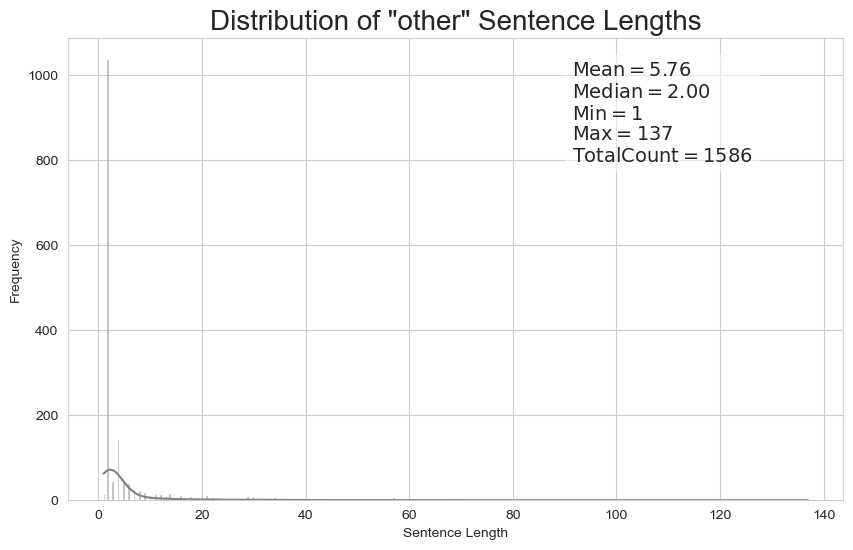

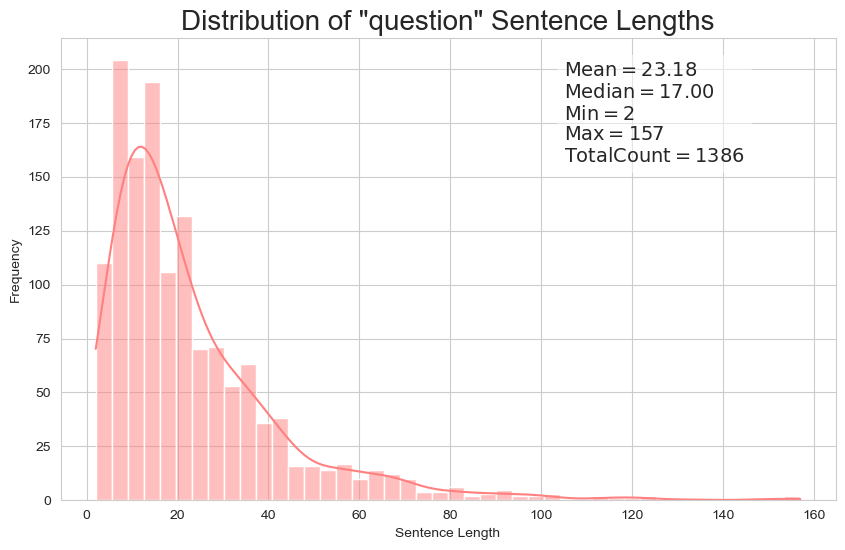

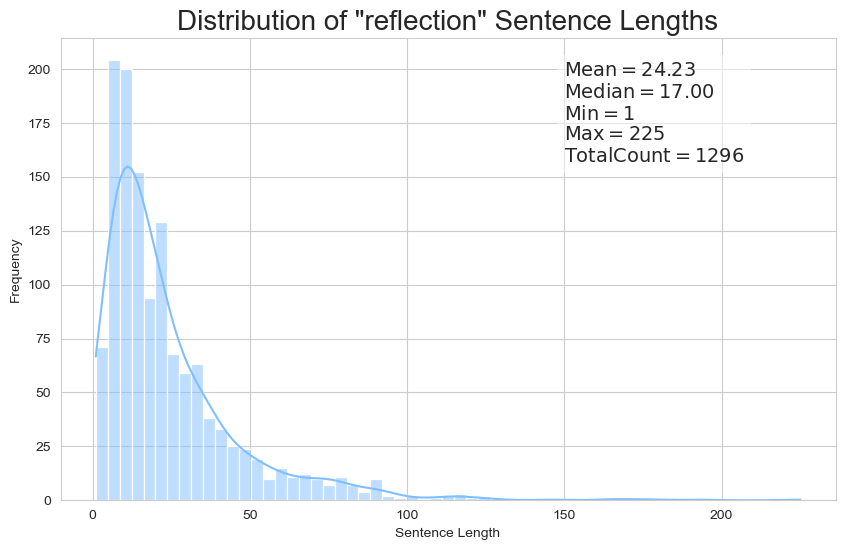

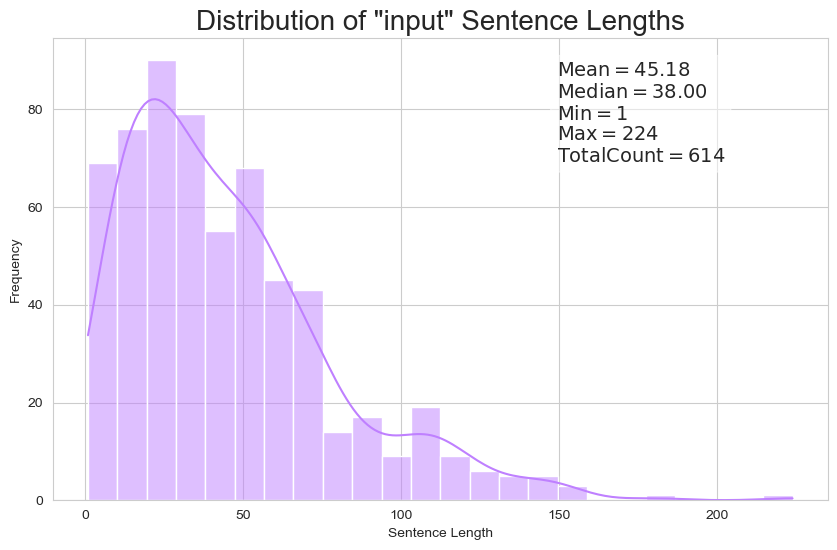

In [510]:
for i in range(0, 4):
    plot_categorical_distribution('data/AnnoMI/dataset.csv', i)